In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
labels_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_classes = 10

In [5]:
!unzip "/content/drive/MyDrive/homework4data.zip" -d "/content"

Archive:  /content/drive/MyDrive/homework1data.zip
  inflating: /content/x_validation.npy  
  inflating: /content/y_test.npy     
  inflating: /content/y_train.npy    
  inflating: /content/y_validation.npy  
  inflating: /content/x_test.npy     
  inflating: /content/x_train.npy    


In [6]:
with open('x_train.npy', 'rb') as file:
    x_train = np.load(file, allow_pickle=True)

with open('y_train.npy', 'rb') as file:
    y_train = np.load(file, allow_pickle=True)

with open('x_validation.npy', 'rb') as file:
    x_validation = np.load(file, allow_pickle=True)

with open('y_validation.npy', 'rb') as file:
    y_validation = np.load(file, allow_pickle=True)

with open('x_test.npy', 'rb') as file:
    x_test = np.load(file, allow_pickle=True)

with open('y_test.npy', 'rb') as file:
    y_test = np.load(file, allow_pickle=True)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(61440000,)
(60000,)
(22888448,)
(22352,)
(20480000,)
(20000,)


In [8]:
x_train = x_train.reshape(y_train.shape[0], 32, 32, 1)
x_validation = x_validation.reshape(y_validation.shape[0], 32, 32, 1)
x_test = x_test.reshape(y_test.shape[0], 32, 32, 1)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 32, 32, 1)
(60000,)
(22352, 32, 32, 1)
(22352,)
(20000, 32, 32, 1)
(20000,)


In [10]:
y_train = utils.to_categorical(y_train, num_classes)
y_validation = utils.to_categorical(y_validation, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [11]:
print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

(60000, 10)
(22352, 10)
(20000, 10)


In [12]:
print(y_train[0])
print(y_validation[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
# Now, onto the classification and creating our model:
model = keras.Sequential()

# First complex (containing three layers):
model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu', input_shape=(32, 32, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second complex (containing three layers):
model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third complex (containing three layers):
model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Tenth layer:
model.add(Flatten()) # since the output of convolution layers is multi-dimensional, we need this layer to flatten the results before going on in our network..

# Eleventh layer:
model.add(Dense(128, activation='relu'))

# Twelfth layer:
model.add(Dense(num_classes, activation='softmax'))

# We then compile our model, ready to be used:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# A summary of the architecture of our neural network.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          8

In [15]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2158 - accuracy: 0.9297 - val_loss: 0.0671 - val_accuracy: 0.9784
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0638 - accuracy: 0.9795 - val_loss: 0.0392 - val_accuracy: 0.9875
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0449 - accuracy: 0.9849 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0351 - accuracy: 0.9881 - val_loss: 0.0259 - val_accuracy: 0.9919
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.0197 - val_accuracy: 0.9943
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0213 - val_accuracy: 0.9937
Epoch 

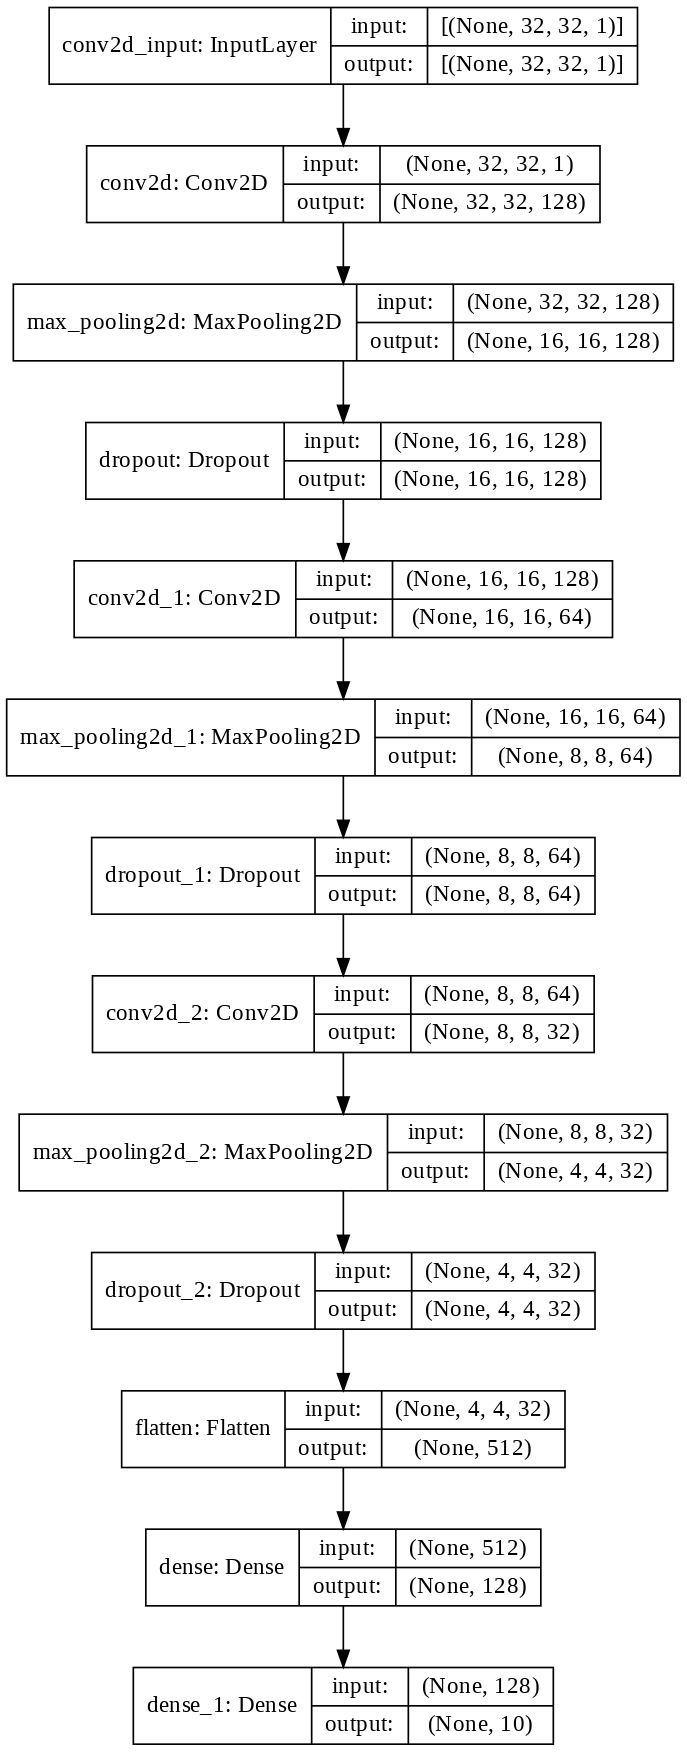

In [16]:
utils.plot_model(model, show_shapes=True, dpi=120)

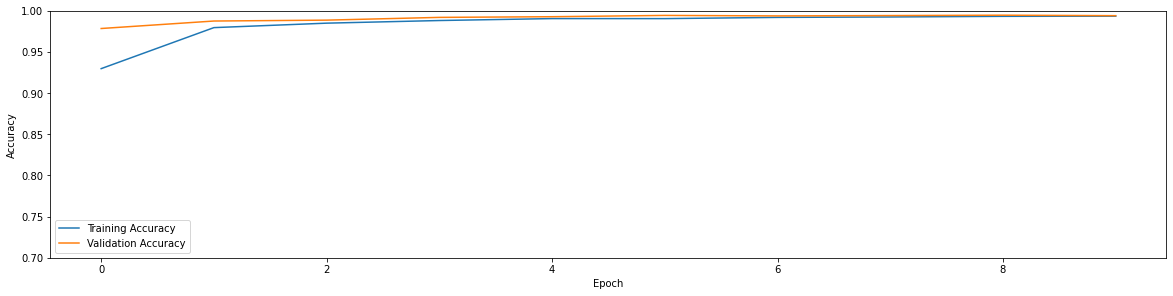

In [17]:
# We evaluate our model:
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')
plt.show()

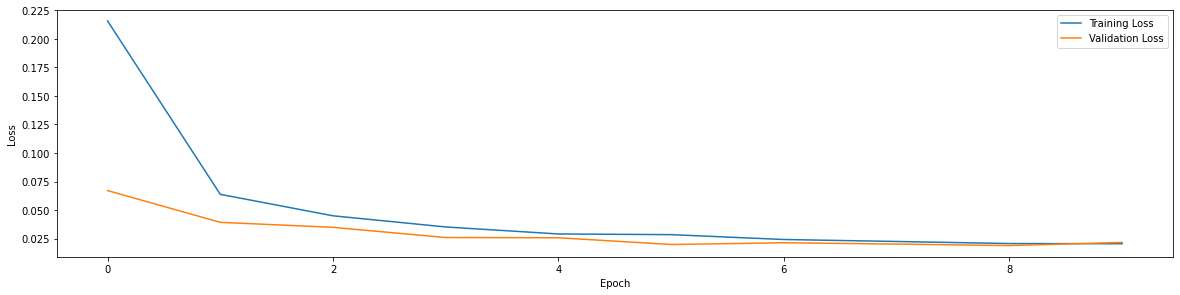

In [18]:
# We evaluate our model:
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [19]:
# Accuracy score:
_, accuracy = model.evaluate(x_test, y_test, verbose=2)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
print(accuracy)

625/625 - 1s - loss: 0.0285 - accuracy: 0.9907
0.9907000064849854


In [20]:
y_test = np.argmax(y_test, axis=1)

In [21]:
# Precision score:
precision = precision_score(y_test, predictions, average='macro')
print(f'Precision: {precision}')

Precision: 0.9907475388314136


In [22]:
# Recall score:
recall = recall_score(y_test, predictions, average='macro')
print(f'Recall: {recall}')

Recall: 0.9907


In [23]:
# F1-Score score:
f1 = f1_score(y_test, predictions, average='macro')
print(f'f1-score: {f1}')

f1-score: 0.9906995326135736


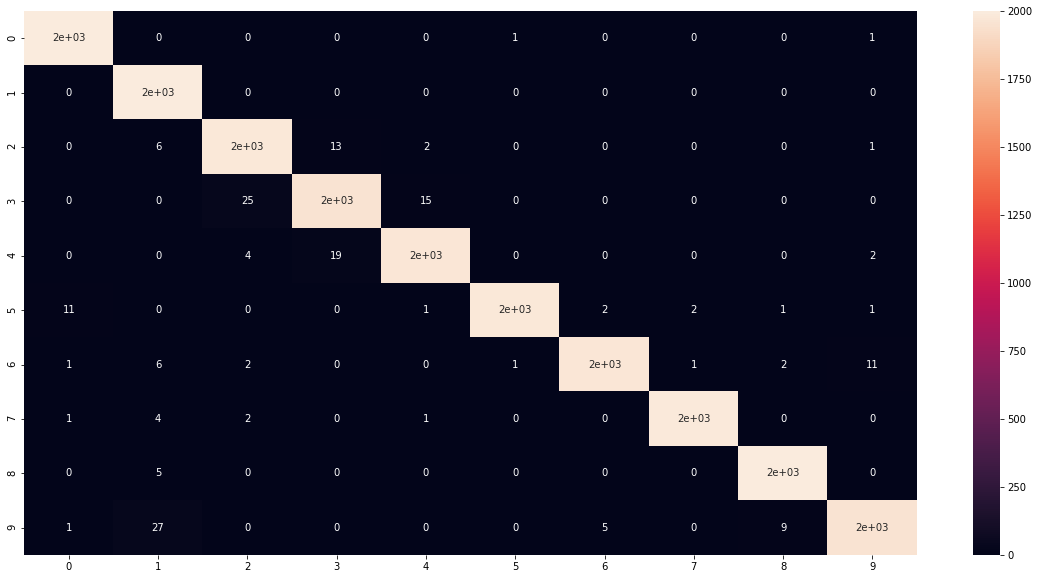

In [24]:
# Confusion Matrix:
cm = confusion_matrix(y_test, predictions, labels=labels_numbers)
df_cm = pd.DataFrame(cm, index=labels_numbers, columns=labels_numbers)
sn.heatmap(df_cm, annot=True)
plt.show()